<a href="https://colab.research.google.com/github/nikshanpatel/CS634-DataMiningProject-Final/blob/master/FinalProject_finalV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data and APIs

## Download Data from Kaggle API

In [1]:
from google.colab import drive
from google.colab import files 
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
# to load kaggle API
!pip install -q kaggle 

In [4]:
# to download the dataset from kaggle
!kaggle competitions download -c nyc-taxi-trip-duration

 91% 57.0M/62.9M [00:00<00:00, 84.2MB/s]
100% 62.9M/62.9M [00:00<00:00, 117MB/s] 
 25% 5.00M/20.3M [00:00<00:00, 31.8MB/s]
100% 20.3M/20.3M [00:00<00:00, 78.8MB/s]
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 167MB/s]


In [5]:
# to unzip
!7za e test.zip


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 21327372 bytes (21 MiB)

Extracting archive: test.zip
--
Path = test.zip
Type = zip
Physical Size = 21327372

  0%     37% - test.csv                75% - test.csv               Everything is Ok

Size:       70794289
Compressed: 21327372


In [6]:
!7za e train.zip


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 65967663 bytes (63 MiB)

Extracting archive: train.zip
--
Path = train.zip
Type = zip
Physical Size = 65967663

  0%     12% - train.csv                 25% - train.csv                 37% - train.csv                 49% - train.csv                 62% - train.csv                 71% - train.csv                 82% - train.csv                 93% - train.csv                Everything is Ok

Size:       200589097
Compressed: 65967663


In [7]:
!7za e sample_submission.zip


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2615198 bytes (2554 KiB)

Extracting archive: sample_submission.zip
--
Path = sample_submission.zip
Type = zip
Physical Size = 2615198

  0%    Everything is Ok

Size:       8751893
Compressed: 2615198


## Import APIs

In [0]:
# import the necessary libraries that are required to run this notebook
import os
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing
from sklearn import metrics
import datetime

import seaborn as sns #for making plots

# scikit-learn's LinearRegression doesn't calculate p-value so we will need to extend the class to do it:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


from xgboost import XGBRegressor
%matplotlib inline

Basemap

We will utilize the matplotlib basemap toolkit library for plotting the maps. It is very lightweight and easy to use. Let's define a map_marker function for our purpose of visualizing long lat marker on the map.

In [9]:
!pip install anaconda

  Created wheel for anaconda: filename=anaconda-0.0.1.1-cp36-none-any.whl size=1124 sha256=c023ce3b61df73e9da2f62a19a1282f25e35c59cb4adcabc0475dd62a3038d1d
  Stored in directory: /root/.cache/pip/wheels/d5/0e/c7/c65ff914fe711a32210656cf0c8d9f28041d78bff409ad96d0
Successfully built anaconda


In [10]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 51.3MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702083 sha256=dbbeb114014bacf805f0d590342b683f44de3db99b889e8f269796fd69c0de94
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj


In [11]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (200 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 145655 files and directories currently installed.)
Prep

## Load trainning and testing data

In [0]:
# Load train data
train_df = pd.read_csv('./train.csv')

# Load test data
test_df = pd.read_csv('./test.csv')


# Problem Definition

What is our goal etc..

**About Competition**


---
In this competition, we are being asked to calculate and predict the distance between a pick- up and drop-off location for a given trip. Part of this notebook we will be analyzing the data and extract the set of features as progress thought out the book. We will be applying number of algorithms to identify the matching one to come up with a model.

We will be focusing on number of features 


**Feature details**

id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.


**Label details**

trip_duration - duration of the trip in seconds

# Data Cleaning

## Quick Look at the datasets

In [13]:
train_df.shape

(1458644, 11)

In [14]:
test_df.shape

(625134, 9)

In [15]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [16]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


testing set doesn't include dropoff_datetime and duration. This is the target variable that we need to model

## Check missing data

In [17]:
# checking missing data in the training dataset
train_df.isna().sum(axis=0)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There is no missing data in training and testing dataset

## Remove Outliers

In [18]:
pd.set_option('display.float_format',lambda x : '%.2f'% x)
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


The maximum trip duration is ~41 days which doesn't make sense. Also maximum number of passengers is 9, which is also strange. We may need to remove some outliers

# Feature Engineering

**Duration**

In [19]:
train_df.trip_duration.describe()

count   1458644.00
mean        959.49
std        5237.43
min           1.00
25%         397.00
50%         662.00
75%        1075.00
max     3526282.00
Name: trip_duration, dtype: float64

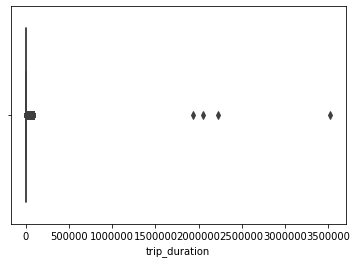

In [20]:
sns.boxplot(train_df.trip_duration)
plt.show()

In [21]:
print('there are', train_df[(train_df.trip_duration < 5)].trip_duration.count(), 'trips took less than 5 seconds, and',
      train_df[(train_df.trip_duration > 86400)].trip_duration.count(), 'trips took more than one day')

there are 845 trips took less than 5 seconds, and 4 trips took more than one day


In [0]:
# remove instances based on Duration in the testing set
# remove these 849
train_df = train_df[train_df.trip_duration >= 5]
train_df = train_df[train_df.trip_duration < 1000000]

In [23]:
train_df.shape

(1457795, 11)

In [24]:
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(train_df.id.nunique()))

There are 1457795 unique id's in Training dataset, which is equal to the number of records


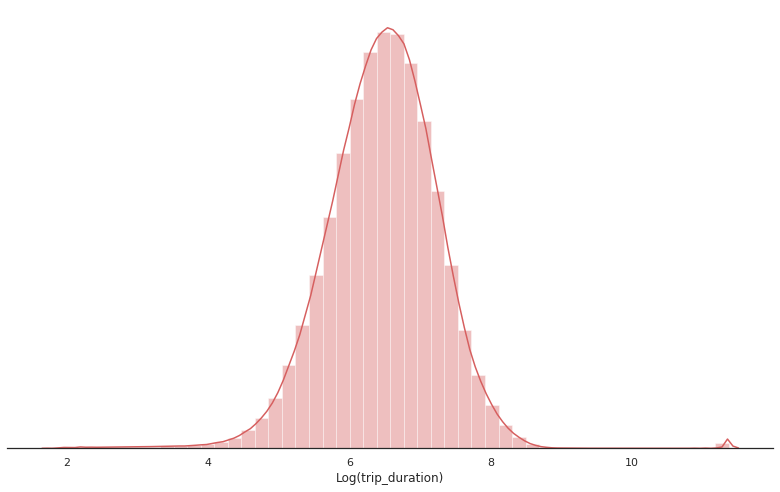

In [25]:
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

**Passenger Count**

In [26]:
# remove instances based on Number of Passengers in the testing set
train_df.passenger_count.value_counts()

1    1032802
2     210256
5      78070
3      59885
6      48327
4      28402
0         48
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Based on New York regulation "A maximum of four passengers can ride in traditional cabs; there are also some five passenger cabs that look more like minivans. A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit." We will need to remove instances with more than 6 passengers. Also, there are 53 trips without passenger that we should also remove

In [0]:
# remove these 53 trips
train_df = train_df[train_df.passenger_count <= 6]
train_df = train_df[train_df.passenger_count > 0]

In [0]:
pd.options.display.float_format = '{:.2f}'.format #To suppres scientific notation.

In [29]:
train_df.shape

(1457742, 11)

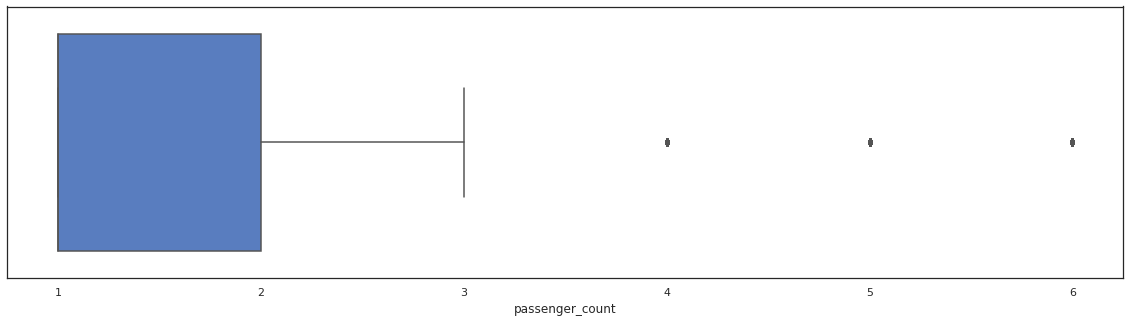

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(train_df.passenger_count)
plt.show()

In [31]:
train_df.passenger_count.describe()

count   1457742.00
mean          1.66
std           1.31
min           1.00
25%           1.00
50%           1.00
75%           2.00
max           6.00
Name: passenger_count, dtype: float64

In [0]:
train_df['passenger_count'] = train_df.passenger_count.map(lambda x: 1 if x == 0 else x)

In [33]:
1457795 - 48 -5

1457742

In [0]:
# remove these 53 trips
train_df = train_df[train_df.passenger_count <= 6]
train_df = train_df[train_df.passenger_count > 0]

In [35]:
train_df.passenger_count.value_counts()

1    1032802
2     210256
5      78070
3      59885
6      48327
4      28402
Name: passenger_count, dtype: int64

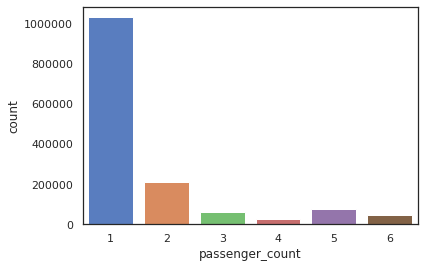

In [36]:
sns.countplot(train_df.passenger_count)
plt.show()

In [37]:
train_df.shape

(1457742, 11)

In [38]:
80000/60/60/24

0.9259259259259259

**Distance**

In [39]:
# Get Distance
!pip install haversine
from haversine import haversine, Unit

In [0]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [0]:
train_df['distance'] = train_df.apply(lambda x: calc_distance(x), axis = 1)

In [42]:
train_df.distance.describe()

count   1457742.00
mean          3.44
std           4.30
min           0.00
25%           1.23
50%           2.10
75%           3.88
max        1240.91
Name: distance, dtype: float64

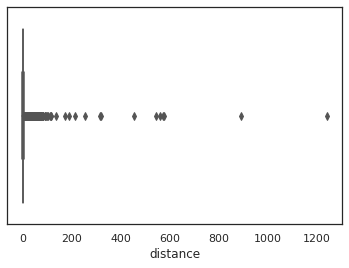

In [43]:
sns.boxplot(train_df.distance)
plt.show()

In [44]:
train_df.trip_duration.groupby(pd.cut(train_df.trip_duration, np.arange(1,max(train_df.trip_duration),3600))).count()

trip_duration
(1, 3601]         1445449
(3601, 7201]        10045
(7201, 10801]         141
(10801, 14401]         35
(14401, 18001]          5
(18001, 21601]         11
(21601, 25201]         11
(25201, 28801]         13
(28801, 32401]         17
(32401, 36001]          8
(36001, 39601]         13
(39601, 43201]          6
(43201, 46801]          8
(46801, 50401]          5
(50401, 54001]          7
(54001, 57601]          5
(57601, 61201]         10
(61201, 64801]         10
(64801, 68401]         10
(68401, 72001]          5
(72001, 75601]         10
(75601, 79201]         17
(79201, 82801]         63
Name: trip_duration, dtype: int64

In [45]:
# remove instances based on Duration in the testing set
train_df[(train_df.distance == 0)].distance.count()

5594

In [0]:
# remove these 845
train_df = train_df[train_df.trip_duration >= 5]
train_df = train_df[train_df.trip_duration <= 1000000]

In [47]:
train_df.distance.describe()

count   1457742.00
mean          3.44
std           4.30
min           0.00
25%           1.23
50%           2.10
75%           3.88
max        1240.91
Name: distance, dtype: float64

In [48]:
train_df.nlargest(5,['distance'])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.81,51.88,-73.99,40.75,N,792,1240.91
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.80,35.08,-79.35,40.44,N,611,891.22
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.99,40.76,-70.35,36.40,N,303,578.84
1100676,id2644780,1,2016-05-03 16:24:07,2016-05-03 17:18:34,2,-73.99,40.75,-79.52,43.92,N,3267,574.88
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.97,40.76,-79.55,43.67,N,1405,562.24


There are trips with 0 distance, and as shown in the chart above, there are some points look like outliers

In [0]:
# remove instance with distance = 0
train_df = train_df[train_df.distance != 0]

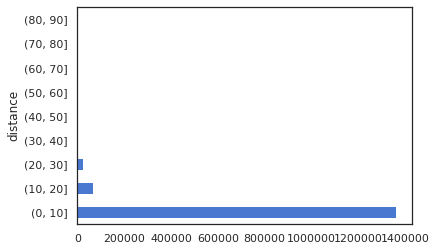

In [50]:
train_df.distance.groupby(pd.cut(train_df.distance, np.arange(0,100,10))).count().plot(kind='barh')
plt.show()

As shown above, most of the rides are completed between 1-10 kms with some of the rides with distances between 10-30 kms

**Speed**

In [0]:
train_df['speed'] = (train_df.distance/(train_df.trip_duration/3600))

In [52]:
train_df.speed.describe()

count   1452148.00
mean         14.47
std          14.76
min           0.00
25%           9.17
50%          12.82
75%          17.87
max        9274.85
Name: speed, dtype: float64

Some trips have speed more than 2,000 meter/hour, which is unrealistic. We will need to remove these instances.

In [0]:
train_df = train_df[train_df.speed <= 110]

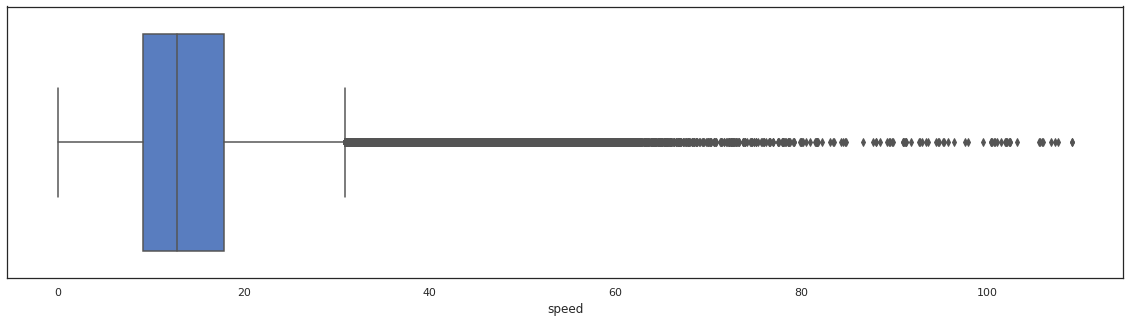

In [54]:
plt.figure(figsize = (20,5))
sns.boxplot(train_df.speed)
plt.show()

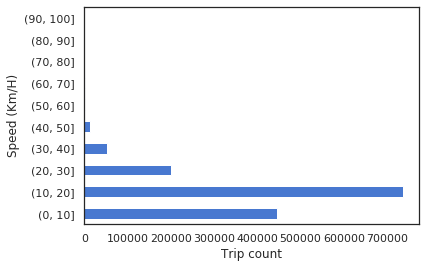

In [55]:
train_df.speed.groupby(pd.cut(train_df.speed, np.arange(0,104,10))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()

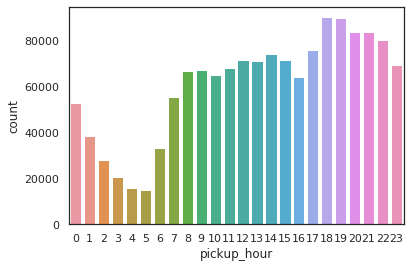

In [63]:
sns.countplot(train_df.pickup_hour)
plt.show()

Observation

It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.

Total Trips per Weekday

Let's take a look now at the distribution of taxi pickups across the week.

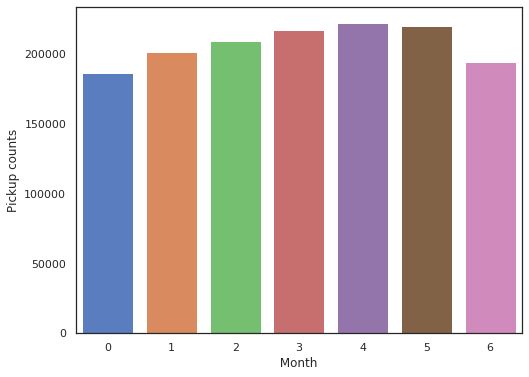

In [172]:
plt.figure(figsize = (8,6))
sns.countplot(train_df.weekday_num)
plt.xlabel(' Month ')
plt.ylabel('Pickup counts')
plt.show()


Observation

Here we can see an increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.

Let's drill down more to see the hourwise pickup pattern across the week

Quite a balance across the months 


here. It could have been more equivalent if we wouldn't have removed the inconsistent records in our study of the univariate analysis

## Time and Date

In [0]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
def convert_datetime(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['weekday'] = df.pickup_datetime.dt.weekday_name
    df['month'] = df.pickup_datetime.dt.month
    df['weekday_number'] = df.pickup_datetime.dt.weekday
    df['pickup_hour'] = df.pickup_datetime.dt.hour

In [0]:
convert_datetime(train_df)
train_df.head()

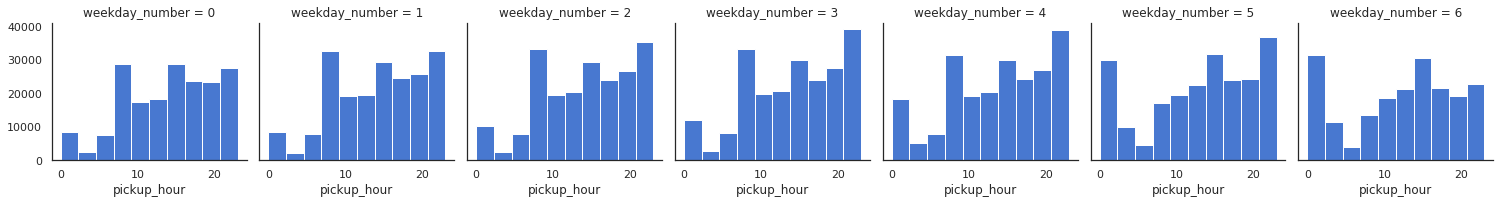

In [66]:
n = sns.FacetGrid(train_df, col='weekday_number')
n.map(plt.hist, 'pickup_hour')
plt.show()

Interesting find:

Taxi pickups increased in the late night hours over the weekend possibly due to more outstation rides or for the late night leisures nearby activities.
Early morning pickups i.e before 5 AM have increased over the weekend in comparison to the office hours pickups i.e. after 7 AM which have decreased due to obvious reasons.
Taxi pickups seems to be consistent across the week at 15 Hours i.e. at 3 PM.

Total trips per month

Let's take a look at the trip distribution across the months to understand if there is any diffrence in the taxi pickups in different months

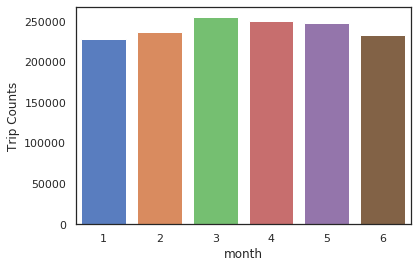

In [68]:
sns.countplot(train_df.month)
plt.ylabel('Trip Counts')
plt.xlabel('month')
plt.show()

In [69]:
convert_datetime(train_df)
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,weekday,month,weekday_number,pickup_hour,weekday_num
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.50,11.86,Monday,3,0,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.81,9.80,Sunday,6,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,6.39,10.82,Tuesday,1,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,1.49,12.47,Wednesday,4,2,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,1.19,9.84,Saturday,3,5,13,5


We need to aggregate the total trip duration to plot it agaist the month. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend.

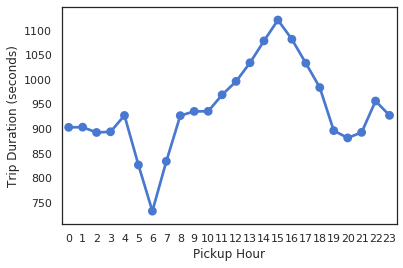

In [70]:
group1 = train_df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

Average trip duration is lowest at 6 AM when there is minimal traffic on the roads. Average trip duration is generally highest around 3 PM during the busy streets. Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM

Trip duration per weekday

Let's now analyze the pattern of trip duration during the week.

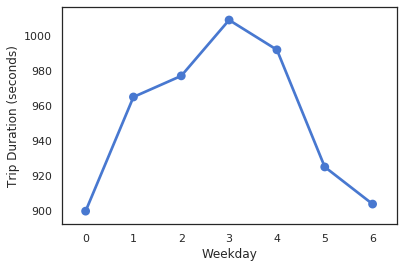

In [71]:
group2 = train_df.groupby('weekday_number').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

We can see that trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days

Trip duratin per month

Let's take a look at the trip duration pattern with respect to the different months.

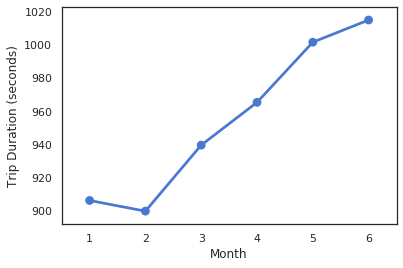

In [72]:
group3 = train_df.groupby('month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

Observations:

We can see an increasing trend in the average trip duration along with each subsequent month. The duration difference between each month is not much. It has increased gradually over a period of 6 months. It is lowest during february when winters starts declining. There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the considered as the wettest month in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June

Trip Duration Per Vendor

We can also look at the average difference between the trip duration for each vendor. However we do know that vendor 2 has larger share of the market. Let's visualize.

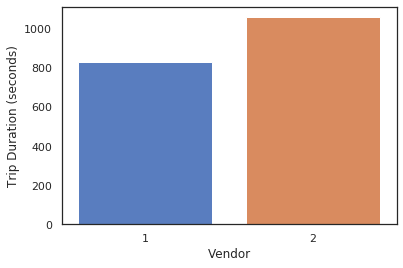

In [73]:
group4 = train_df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by approx 200 seconds i.e. atleast 3 minutes per trip.

Distance per Hour

Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.

Since we have already done the outlier analysis for this variable as well. We can take the mean as aggregate measure for our visualizations.

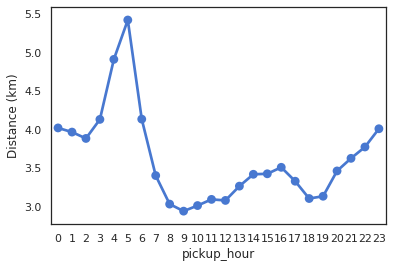

In [74]:
group5 = train_df.groupby('pickup_hour').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.show()

Observations:

Trip distance is highest during early morning hours which can account for some things like: Outstation trips taken during the weekends. Longer trips towards the city airport which is located in the outskirts of the city. Trip distance is fairly equal from morning till the evening varying around 3 - 3.5 kms. It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

Distance per weekday

Let's analyze the average trip distance covered on each day of the week.

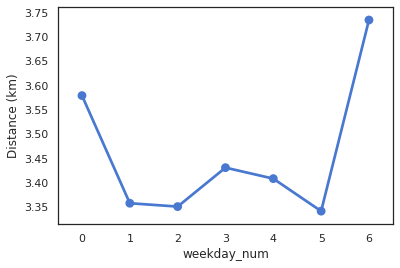

In [75]:
group6 = train_df.groupby('weekday_num').distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (km)')
plt.show()

So it's a fairly equal distribution with average distance metric verying around 3.5 km/h with Sunday being at the top may be due to outstation trips or night trips towards the airport

Distance per month

Now we will look at the average trip distance covered per month

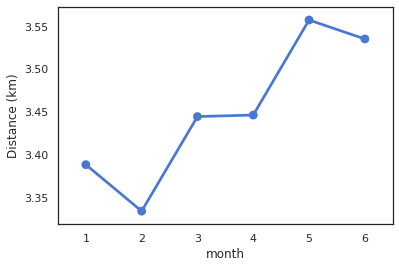

In [76]:
group7 = train_df.groupby('month').distance.mean()
sns.pointplot(group7.index, group7.values)
plt.ylabel('Distance (km)')
plt.show()

Here also the distibution is almost equivalent, varying mostly around 3.5 km/h with 5th month being the highest in the average distance and 2nd month being the lowest.

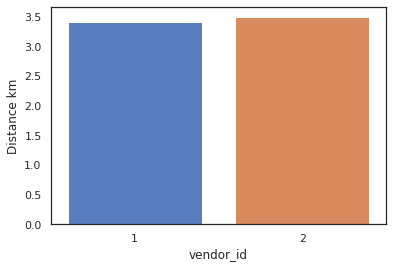

In [77]:
group8 = train_df.groupby('vendor_id').distance.mean()
sns.barplot(group8.index, group8.values)
plt.ylabel("Distance km")
plt.show()

This is more or less same picture with both the vendors. Nothing more to analyze in this

Distance v/s Trip duration

Let's visualize the relationship between Distance covered and respective trip duration.

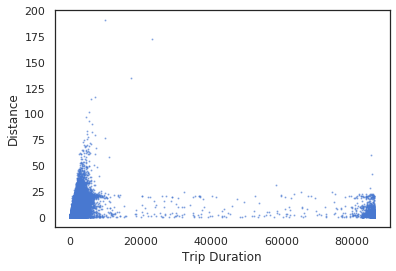

In [78]:
plt.scatter(train_df.trip_duration, train_df.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

Interesting find:

There are lots of trips which covered negligible distance but clocked more than 20,000 seconds in terms of the Duration. Initially there is some proper correlation between the distance covered and the trip duration in the graph. but later on it all seems uncorrelated. There were few trips which covered huge distance of approx 200 kms within very less time frame, which is unlikely and should be treated as outliers. Let's focus on the graph area where distance is < 50 km and duration is < 1000 seconds.

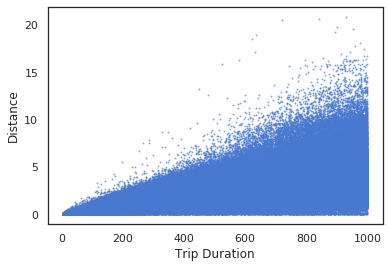

In [79]:
dur_dist = train_df.loc[(train_df.distance < 50) & (train_df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

Observations:

There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

Idea:

We should remove those trips which covered 0 km distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

In [0]:
data = train_df[~((train_df.distance == 0) & (train_df.trip_duration >= 60))]

Now, Instead of looking at each and every trip, we should approximate and try to filter those trips which covered less than 1 km distance and but clocked more than an hour.

In [0]:
duo = data.loc[(train_df['distance'] <= 1) & (train_df['trip_duration'] >= 3600),['distance','trip_duration']].reset_index(drop=True)

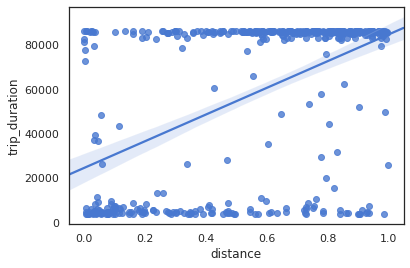

In [82]:
sns.regplot(duo.distance, duo.trip_duration)
plt.show()

Observations:

Though the straight line tries to show some linear relation between the two. But there seems to be negligible correlation between these two metric as seen from the scatter plot where it should have been a linear distribution. It is rarely occurs that customer keep sitting in the taxi for more than an hour and it does not travel for even 1 km.

These should be removed to bring in more consistency to our results

In [0]:
data = train_df[~((train_df['distance'] <= 1) & (train_df['trip_duration'] >= 3600))]

Average speed per hour

Let's look at the average speed of NYC Taxi per hour.

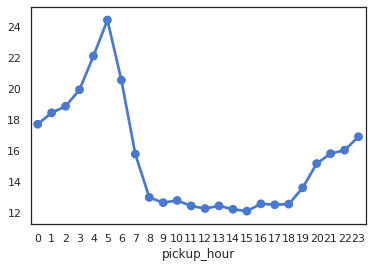

In [84]:
group9 = train_df.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.show()

Observation

The average trend is totally inline with the normal circumstances. Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours. Average taxi speed is highest at 5 AM in the morning, then it declines steeply as the office hours approaches. Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening

Average speed per weekday

Let's visualize that on an average what is the speed of a taxi on any given weekday.

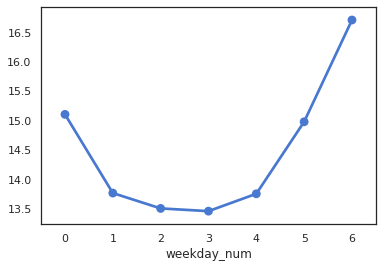

In [85]:
group10 = train_df.groupby('weekday_num').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.show()

Observations

Average taxi speed is higher on weekend as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners. Even on monday the average taxi speed is shown higher which is quite surprising when it is one of the most busiest day after the weekend. There can be several possibility for such behaviour Lot of customers who come back from outstation in early hours of Monday before 6 AM to attend office on time. Early morning hours customers who come from the airports after vacation to attend office/business on time for the coming week. There could be some more reasons as well which only a local must be aware of. We also can't deny the anomalies in the dataset. which is quite cumbersome to spot in such a large dataset.

Passenger count per vendor Let's try some different metric in the series i.e. passenger count. We will plot it agaist the vendor only because it will not be much helpful to plot it against hour, weekday or month like others as the passenger count should be a whole number and not a ratio.

we will take mean as the aggregate measure because we already did the outlier analysis on this metric. So our results woudn't be affected by some extreme values. Also if we take median than it will return only 1 because majorty of the trips have been taken by single passenger. Let's take a look about it's distribution.

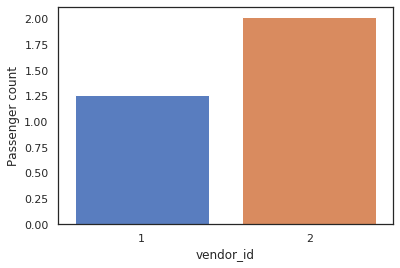

In [87]:
group9 = train_df.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.show()

Clear difference between the two operators for the average passenger count in all trips. It seems that vendor 2 trips generally consist of 2 passengers as compared to the vendor 1 with 1 passenger. Let's bifurcate it further

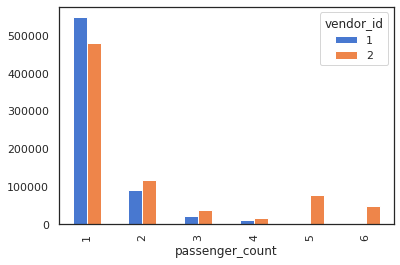

In [88]:
train_df.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

Interesting find

It seems that most of the big cars are served by the Vendor 2 including minivans because other than passenger 1, vendor 2 has majority in serving more than 1 passenger count and that explains it greater share of the market



## Creating Dummy Variables

We can start training our model at this point. However, to add the model accuracy, we can convert our categorical data into dummy variables. We will use the function in Pandas library to make the change

In [0]:
def create_dummy(df):
  dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='flag')
  df = pd.concat([df,dummy],axis=1)

  dummy = pd.get_dummies(df.vendor_id, prefix='vendor_id')
  df = pd.concat([df,dummy],axis=1)

  dummy = pd.get_dummies(df.passenger_count, prefix='passenger_count')
  df = pd.concat([df,dummy],axis=1)

  dummy = pd.get_dummies(df.month, prefix='month')
  df = pd.concat([df,dummy],axis=1)
  
  dummy = pd.get_dummies(df.weekday_number, prefix='weekday_number')
  df = pd.concat([df,dummy],axis=1)
  
  dummy = pd.get_dummies(df.pickup_hour, prefix='pickup_hour')
  df = pd.concat([df,dummy],axis=1)
  
  return df

In [0]:
train_df = create_dummy(train_df)

In [91]:
train_df.shape

(1452035, 65)

In [92]:
# get the index of the features and label
list(zip(range(0,len(train_df.columns)),train_df.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration'),
 (11, 'distance'),
 (12, 'speed'),
 (13, 'weekday'),
 (14, 'month'),
 (15, 'weekday_number'),
 (16, 'pickup_hour'),
 (17, 'weekday_num'),
 (18, 'flag_N'),
 (19, 'flag_Y'),
 (20, 'vendor_id_1'),
 (21, 'vendor_id_2'),
 (22, 'passenger_count_1'),
 (23, 'passenger_count_2'),
 (24, 'passenger_count_3'),
 (25, 'passenger_count_4'),
 (26, 'passenger_count_5'),
 (27, 'passenger_count_6'),
 (28, 'month_1'),
 (29, 'month_2'),
 (30, 'month_3'),
 (31, 'month_4'),
 (32, 'month_5'),
 (33, 'month_6'),
 (34, 'weekday_number_0'),
 (35, 'weekday_number_1'),
 (36, 'weekday_number_2'),
 (37, 'weekday_number_3'),
 (38, 'weekday_number_4'),
 (39, 'weekday_number_5'),
 (40, 'weekday_number_6'),
 (41, 'pickup_hour_0'),
 (42, 'pickup_hour_1'),
 (43, 'p

In [131]:
# drop all the redundant columns such as pickup_datetime, weekday, month etc.
# and drop unneeded features such as id, speed (a dependant of duration)
# also seperate features with labels

X_train_set = train_df.iloc[:,np.r_[11,17:65]]
y_train_set = train_df["trip_duration"].copy()

# General equation for multiple linear regression usually includes the constant value, 
# so we will add "1" to each instance first 
X_train_set = sm.add_constant(X_train_set)
print(X_train_set.shape)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(1452035, 50)


In [132]:
X_train_set.head()

,const,distance,weekday_num,flag_N,flag_Y,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,month_1,month_2,month_3,month_4,month_5,month_6,weekday_number_0,weekday_number_1,weekday_number_2,weekday_number_3,weekday_number_4,weekday_number_5,weekday_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,1.00,1.50,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.00,1.81,6,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.00,6.39,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.00,1.49,2,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.00,1.19,5,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Backward Feature selection


We will run linear regression multiple time by using different combination of features and check p value of each regression iteration till we reach the level of p value that is less than 5%. If the regression p value is greater than 5%, we will reject the feature from the list of array and continue with next iteration until we reach the optimal combination of features.

In [0]:
X_train_opt = X_train_set

est = sm.OLS(y_train_set, X_train_opt)
est2 = est.fit()
# print(est2.summary())

In [134]:
X_train_opt.shape

(1452035, 50)

In [135]:
# fetch p-value
p_Vals = est2.pvalues
print(p_Vals)

const               0.00
distance            0.00
weekday_num         0.00
flag_N              0.00
flag_Y              0.00
vendor_id_1         0.00
vendor_id_2         0.00
passenger_count_1   0.60
passenger_count_2   0.03
passenger_count_3   0.00
passenger_count_4   0.00
passenger_count_5   0.13
passenger_count_6   0.16
month_1             0.02
month_2             0.08
month_3             0.05
month_4             0.00
month_5             0.00
month_6             0.00
weekday_number_0    0.36
weekday_number_1    0.00
weekday_number_2    0.00
weekday_number_3    0.00
weekday_number_4    0.00
weekday_number_5    0.01
weekday_number_6    0.00
pickup_hour_0       0.00
pickup_hour_1       0.00
pickup_hour_2       0.00
pickup_hour_3       0.00
pickup_hour_4       0.00
pickup_hour_5       0.00
pickup_hour_6       0.00
pickup_hour_7       0.00
pickup_hour_8       0.00
pickup_hour_9       0.00
pickup_hour_10      0.00
pickup_hour_11      0.00
pickup_hour_12      0.00
pickup_hour_13      0.00


In [136]:
#define significance level for accepting the feature.
sig_Level = 0.05

#Looping over features and remove the feature with p value less than the 5%
while max(p_Vals) > sig_Level:
    
    X_train_opt = X_train_opt.drop(X_train_opt.columns[np.argmax(np.array(p_Vals))],axis=1)

    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(np.array(p_Vals)))))
    print(str(X_train_opt.shape[1]-1) + " dimensions remaining now... \n")
    
    est = sm.OLS(y_train_set, X_train_opt)
    est2 = est.fit()
    p_Vals = est2.pvalues
    print("=================================================================\n")




Feature at index 7 is removed 

48 dimensions remaining now... 




Feature at index 47 is removed 

47 dimensions remaining now... 




Feature at index 18 is removed 

46 dimensions remaining now... 




Feature at index 11 is removed 

45 dimensions remaining now... 




Feature at index 10 is removed 

44 dimensions remaining now... 




Feature at index 12 is removed 

43 dimensions remaining now... 




Feature at index 41 is removed 

42 dimensions remaining now... 




Feature at index 23 is removed 

41 dimensions remaining now... 




Feature at index 40 is removed 

40 dimensions remaining now... 




Feature at index 22 is removed 

39 dimensions remaining now... 




Feature at index 22 is removed 

38 dimensions remaining now... 




In [137]:
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_train_opt.shape[1]-1)))
print(est2.pvalues)

Final stat summary with optimal 38 features
const               0.00
distance            0.00
weekday_num         0.00
flag_N              0.00
flag_Y              0.00
vendor_id_1         0.00
vendor_id_2         0.00
passenger_count_2   0.02
passenger_count_3   0.00
passenger_count_4   0.00
month_1             0.00
month_2             0.02
month_4             0.00
month_5             0.00
month_6             0.00
weekday_number_1    0.00
weekday_number_2    0.00
weekday_number_3    0.00
weekday_number_4    0.00
weekday_number_5    0.01
weekday_number_6    0.00
pickup_hour_0       0.01
pickup_hour_4       0.00
pickup_hour_5       0.00
pickup_hour_6       0.00
pickup_hour_7       0.00
pickup_hour_8       0.00
pickup_hour_9       0.00
pickup_hour_10      0.00
pickup_hour_11      0.00
pickup_hour_12      0.00
pickup_hour_13      0.00
pickup_hour_14      0.00
pickup_hour_15      0.00
pickup_hour_16      0.00
pickup_hour_17      0.00
pickup_hour_18      0.00
pickup_hour_19      0.00
pickup

# Modelling

## Linear Regression

### Using all features

In [0]:
#Split data from the all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_train_set,y_train_set, random_state=4, test_size=0.2)

In [139]:
#Linear regressor for all features
regressor0 = LinearRegression() 
regressor0.fit(X_train_all,y_train_all) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predict from the test features of Feature Selection group
y_pred_all = regressor0.predict(X_test_all) 

### Using the selected features

In [0]:
#Split data from the feature selection group
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_train_opt,y_train_set, random_state=4, test_size=0.2)

In [142]:
#Linear regressor for the Feature selection group
regressor1 = LinearRegression() 
regressor1.fit(X_train_fs,y_train_fs) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predict from the test features of Feature Selection group
y_pred_fs = regressor1.predict(X_test_fs) 

In [144]:
#Evaluate the models

print('RMSE score for the Multiple LR using all features is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_all,y_pred_all))))
print('Variance score for the Multiple LR is : %.2f' % regressor0.score(X_test_all, y_test_all))
print("\n")

print('RMSE score for the Multiple LR FS is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_fs))))
print('Variance score for the Multiple LR FS is : %.2f' % regressor1.score(X_test_fs, y_test_fs))
print("\n")

RMSE score for the Multiple LR using all features is : 3113.417961841732
Variance score for the Multiple LR is : 0.03


RMSE score for the Multiple LR FS is : 3113.372653049368
Variance score for the Multiple LR FS is : 0.03




both of the regreesor are bad :(

they all have very high root mean squared value and low variance score

why is this?

### Correlation

In [145]:
corr_matrix = train_df.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

trip_duration        1.00
distance             0.16
pickup_longitude     0.04
vendor_id_2          0.04
vendor_id            0.04
dropoff_longitude    0.03
passenger_count      0.01
month                0.01
pickup_hour_15       0.01
pickup_hour_14       0.01
passenger_count_5    0.01
pickup_hour_16       0.01
month_6              0.01
weekday_number_3     0.01
month_5              0.01
passenger_count_6    0.01
pickup_hour          0.01
pickup_hour_17       0.01
pickup_hour_13       0.01
passenger_count_2    0.01
weekday_number_4     0.00
passenger_count_3    0.00
passenger_count_4    0.00
flag_Y               0.00
pickup_hour_12       0.00
weekday_number_2     0.00
pickup_hour_18       0.00
month_4              0.00
weekday_number_1     0.00
pickup_hour_11       0.00
pickup_hour_22       0.00
pickup_hour_4       -0.00
pickup_hour_10      -0.00
pickup_hour_9       -0.00
weekday_number      -0.00
weekday_num         -0.00
pickup_hour_8       -0.00
pickup_hour_23      -0.00
month_3     

the correlation between each feature and duration is relative small when we calculate the Pearson correlation as shown above. None of the features is linearly correlated with the target variable

let's see if we can use other regressors...

## Decision Trees Regression

We also learned in class that Decision Trees are also capable of performing regression tasks. We will try to build a regression tree using Scikit-Learn's DecisionTreeRegressor class

In [0]:
#Decision Trees regressor for all features
tree_reg_full = DecisionTreeRegressor(max_depth=2)
tree_reg_full.fit(X_train_all,y_train_all) 
#Predict from the test features of Feature Selection group
y_pred_tree_reg_all = tree_reg_full.predict(X_test_all) 

In [0]:
#Decision Trees regressor for all features
tree_reg_fs = DecisionTreeRegressor(max_depth=2)
tree_reg_fs.fit(X_train_fs,y_train_fs) 
#Predict from the test features of Feature Selection group
y_pred_tree_reg_fs = tree_reg_fs.predict(X_test_fs) 

In [148]:
print('RMSE score for Decision Trees Regressor using full features is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_all,y_pred_tree_reg_all))))
print("\n")

print('RMSE score for Decision Trees Regressor using selected features is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_tree_reg_fs))))
print("\n")


RMSE score for Decision Trees Regressor using full features is : 3119.723067714251


RMSE score for Decision Trees Regressor using selected features is : 3119.723067714251




It actually got worse by using Decision Trees Regressors. 
One interesting thing is that the RMSE scores are the same for both the full features and selected features for training. 
We will move one to the next training algorithm - Gradient Boosting

## Random Forest Regression

In [208]:
#instantiate the object for the Random Forest Regressor with default params from raw data
regressor_rf_full = RandomForestRegressor(n_jobs=-1)

#instantiate the object for the Random Forest Regressor with default params for Feature Selection Group
regressor_rf_fs = RandomForestRegressor(n_jobs=-1)

#Train the object with default params for raw data
regressor_rf_full.fit(X_train_all,y_train_all)

#Train the object with default params for Feature Selection Group
regressor_rf_fs.fit(X_train_fs,y_train_fs)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
#Predict the output with object of default params for Feature Selection Group
y_pred_rf_full = regressor_rf_full.predict(X_test_all)

#Predict the output with object of default params for Feature Selection Group
y_pred_rf_fs = regressor_rf_fs.predict(X_test_fs)


In [210]:
print(np.sqrt(metrics.mean_squared_error(y_test_all,y_pred_rf_full)))
print(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_rf_fs)))

3663.3828793403313
3465.1522618525173


The resulted RMSR are even bigger than Decision Tress. We will try another algo...

## XGBoost Regression

In [0]:
import xgboost as xgb

In [174]:
# prepare data in the test.csv
test_df = pd.read_csv('./test.csv')
# 1. get distance
test_df['distance'] = test_df.apply(lambda x: calc_distance(x), axis = 1)
# 2. get Time and Date
convert_datetime(test_df)
# 3. get dummy 
test_df = create_dummy(test_df)
test_ID = test_df["id"].copy()
test = test_df.drop(['id','vendor_id','pickup_datetime','passenger_count','store_and_fwd_flag','month','weekday_number','pickup_hour', 'weekday',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'passenger_count_0'], axis = 1)


test = sm.add_constant(test)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [185]:
print(test.shape)
print(X_train_all.shape)

(625134, 50)
(1161628, 50)


In [184]:
# make sure all columns in testing set are the same as in training set
test.columns.difference(X_train_all.columns)

Index([], dtype='object')

In [199]:
test.columns.get_loc("passenger_count_9")

12

In [0]:
# X_train_all = X_train_all.drop(['passenger_count_9'], axis = 1)


In [0]:
X_train_all.insert(loc=12,column="passenger_count_9",value=0)

In [201]:
X_train_all.head()

,const,distance,flag_N,flag_Y,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_9,month_1,month_2,month_3,month_4,month_5,month_6,weekday_number_0,weekday_number_1,weekday_number_2,weekday_number_3,weekday_number_4,weekday_number_5,weekday_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
802829,1.00,2.55,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
661568,1.00,0.82,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376904,1.00,15.66,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
815680,1.00,1.81,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1316588,1.00,2.02,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
X_train_all = X_train_all.drop(['weekday_num'], axis = 1)


In [187]:
test.head()

,const,distance,flag_N,flag_Y,vendor_id_1,vendor_id_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_9,month_1,month_2,month_3,month_4,month_5,month_6,weekday_number_0,weekday_number_1,weekday_number_2,weekday_number_3,weekday_number_4,weekday_number_5,weekday_number_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,1.00,2.75,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.00,2.76,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.00,1.31,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00,5.27,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00,0.96,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#Split data from the all features
X_train, X_test, Y_train, Y_test = train_test_split(X_train_all,y_train_all, random_state=4, test_size=0.2)

In [0]:
Test_master = test

In [204]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [205]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:3185.79	valid-rmse:3134.27
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:3145.64	valid-rmse:3098.24
[2]	train-rmse:3132.25	valid-rmse:3089.18
[3]	train-rmse:3127.1	valid-rmse:3086.3
[4]	train-rmse:3123.12	valid-rmse:3085.57
[5]	train-rmse:3119.96	valid-rmse:3085.5
[6]	train-rmse:3115.95	valid-rmse:3085.19
[7]	train-rmse:3110.9	valid-rmse:3085.29
[8]	train-rmse:3108.65	valid-rmse:3085.02
[9]	train-rmse:3105.83	valid-rmse:3085.23
Modeling RMSLE 3085.01733


Out of interest, we can investigate the importance of each feature, to understand what affects the trip duration the most significantly. Here's how XGBoost allows us to do it:

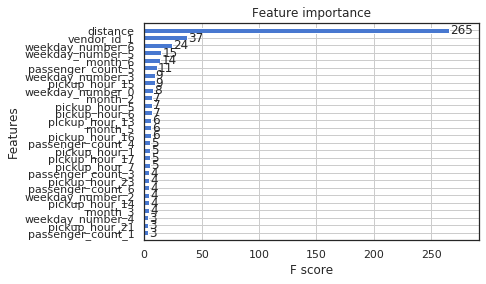

In [182]:
xgb.plot_importance(model, max_num_features=28, height=0.7)

# Conclusion and Submission

Based on the RMSE of each models, we have decided to pick the one with lowest RMSE - XBGoost using selected features



In [0]:
pred = model.predict(dtest)

In [0]:
submission = pd.concat([test_ID, pd.DataFrame(pred)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission.to_csv("submission.csv", index=False)